# Naive Bayes Classifer for Stress Classification

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

## Importing the Dataset

In [5]:
df = pd.read_csv('Datasets/Stress.csv')

In [6]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [7]:
len((df.text)[0])

571

### Adding Word Count and Character Count of text

In [9]:
word_count =[] 
char_count = []
for text in df.text:
    word_count.append(len(text.split()))
    char_count.append(len(text))
new_df = pd.DataFrame({"char_count": char_count, "word_count": word_count})
df = pd.concat([df, new_df], axis = 1)
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,char_count,word_count
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,571,113
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588,108
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,166
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,273
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,89


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.loc[:, ['word_count', 'char_count']])
df.loc[:, ['word_count', 'char_count']] = scaler.transform(df.loc[:, ['word_count', 'char_count']])
df.head()

## Data Preprocessing

### Visualizing Null Values in the Dataset

In [13]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
char_count          0
word_count          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
 7   char_count        2838 non-null   float64
 8   word_count        2838 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 199.7+ KB


### Visualization of Stress Distribution Based on Months

In [16]:

df['MONTH'] = df['social_timestamp'].apply(lambda date: datetime.fromtimestamp(date).month)
# news_data['MONTH']=news_data['MONTH'].replace({3: 'MARCH',4 : 'APRIL' , 5 :'MAY',6:'JUNE',7:'JULY',8:'AUGUST'})
# ax = sns.countplot(x="MONTH", data=df).set_title('MONTH ANALYSIS')

In [18]:
df['Day'] = df['social_timestamp'].apply(lambda date: datetime.fromtimestamp(date).day)
# news_data['MONTH']=news_data['MONTH'].replace({3: 'MARCH',4 : 'APRIL' , 5 :'MAY',6:'JUNE',7:'JULY',8:'AUGUST'})
# ax = sns.countplot(x="Day", data=df).set_title('Day ANALYSIS')

In [19]:
df['WeekDay'] = df['social_timestamp'].apply(lambda date: datetime.fromtimestamp(date).weekday())
# news_data['MONTH']=news_data['MONTH'].replace({3: 'MARCH',4 : 'APRIL' , 5 :'MAY',6:'JUNE',7:'JULY',8:'AUGUST'})
# ax = sns.countplot(x="WeekDay", data=df).set_title('WeekDay ANALYSIS')

In [20]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,char_count,word_count,MONTH,Day,WeekDay
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,0.345989,0.362460,3,21,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,0.356399,0.346278,5,22,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,0.515003,0.533981,9,3,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,0.778322,0.880259,1,20,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,0.322719,0.284790,10,18,3


### Equal Width Binning of Time-stamp Data into 10 bins

In [22]:
df['social_timestamp'] = pd.cut(df['social_timestamp'], 10)

In [23]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,char_count,word_count,MONTH,Day,WeekDay
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,"(1518865163.2, 1524796987.4]",0.345989,0.362460,3,21,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,"(1524796987.4, 1530728811.6]",0.356399,0.346278,5,22,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,"(1530728811.6, 1536660635.8]",0.515003,0.533981,9,3,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,"(1512933339.0, 1518865163.2]",0.778322,0.880259,1,20,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,"(1536660635.8, 1542592460.0]",0.322719,0.284790,10,18,3


### Visualizing the Stress Distribution Based on Timeline

In [25]:
new_df = df.copy() ##Copying the dataset

In [26]:
new_df = new_df.assign(inv_label = 1-new_df['label'])
new_df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,char_count,word_count,MONTH,Day,WeekDay,inv_label
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,"(1518865163.2, 1524796987.4]",0.345989,0.362460,3,21,2,0
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,"(1524796987.4, 1530728811.6]",0.356399,0.346278,5,22,1,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,"(1530728811.6, 1536660635.8]",0.515003,0.533981,9,3,0,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,"(1512933339.0, 1518865163.2]",0.778322,0.880259,1,20,5,0
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,"(1536660635.8, 1542592460.0]",0.322719,0.284790,10,18,3,0


In [27]:
# df_viz_months = pd.pivot_table(data = new_df, index =['MONTH'], values=['label', 'inv_label'], aggfunc = 'sum')
# df_viz_months.rename(columns = {'label':'stress', 'inv_label':'no-stress'}, inplace = True)
# df_viz_months

In [28]:
# df_viz_months.plot.barh()

In [29]:
# df_viz_binning = pd.pivot_table(data = new_df, index =['social_timestamp'], values=['label', 'inv_label'], aggfunc = 'sum')
# df_viz_binning.rename(columns = {'label':'stress', 'inv_label':'no-stress'}, inplace = True)
# df_viz_months.plot.barh()

In [30]:
# df_viz_days = pd.pivot_table(data = new_df, index =['Day'], values=['label', 'inv_label'], aggfunc = 'sum')
# df_viz_days.rename(columns = {'label':'stress', 'inv_label':'no-stress'}, inplace = True)
# df_viz_days.plot.barh()

In [31]:
# df_viz_weekdays = pd.pivot_table(data = new_df, index =['WeekDay'], values=['label', 'inv_label'], aggfunc = 'sum')
# df_viz_weekdays.rename(columns = {'label':'stress', 'inv_label':'no-stress'}, inplace = True)
# df_viz_weekdays.plot.barh()

### Dropping Unnecessary Column(s)

In [33]:
df.drop(columns=['post_id', 'sentence_range', 'social_timestamp', 'MONTH', 'Day', 'WeekDay', 'char_count'], inplace = True)

In [34]:
df.head()

,subreddit,text,label,confidence,word_count
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,0.362460
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,0.346278
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,0.533981
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,0.880259
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,0.284790


### Handling Textual Data

#### Creating Word Cloud

In [37]:
# comment_words = ''
stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in (df.loc[df['label'] == 1]).text:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()

In [38]:
# comment_words = ''
# stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in (df.loc[df['label'] == 0]).text:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()

In [39]:
# len(STOPWORDS)

### Removing Stop Words and Punctuations from dataset

In [41]:
# df.text

In [42]:
import string
punctuations = string.punctuation
texts = []
for text in df.text:
    text = text.lower()
    tokens = []
    for word in text.split():
        if not(word in stopwords):
            chars = []
            for char in word:
                if not(char in punctuations):
                    chars.append(char)
            tokens.append(''.join(chars))
    # texts.append(' '.join(tokens))
    texts.append(tokens)
texts
df.text = texts

In [43]:
df.text

0       [said, felt, way, before, suggeted, go, rest, ...
1       [hey, rassistance, sure, right, place, post, t...
2       [mom, hit, newspaper, shocked, this, knows, pl...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [, her, week, ago, precious, you, i, ignored, ...
2834    [ability, cope, anymore, trying, lot, things, ...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: text, Length: 2838, dtype: object

In [44]:
# df.head()

### Removing the words that are not generally used in english language

In [46]:
# This is way too time consuming and the accuracy also dropped although the feature set was reduced.

# from nltk.corpus import words
# common_words = words.words()

# texts = []
# for text in df.text:
#     word_list = []
#     for word in text:
#         if (word in common_words):
#             word_list.append(word)
#     texts.append(word_list)
# df['text'] = texts

### Stemming the text

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
ps = PorterStemmer()

stemmed = []
for text in df.text:
    stemmed.append([ps.stem(word) for word in text])

df['stemmed'] = stemmed

In [49]:
df.head()

,subreddit,text,label,confidence,word_count,stemmed
0,ptsd,"[said, felt, way, before, suggeted, go, rest, ...",1,0.8,0.362460,"[said, felt, way, befor, sugget, go, rest, tri..."
1,assistance,"[hey, rassistance, sure, right, place, post, t...",0,1.0,0.346278,"[hey, rassist, sure, right, place, post, thi, ..."
2,ptsd,"[mom, hit, newspaper, shocked, this, knows, pl...",1,0.8,0.533981,"[mom, hit, newspap, shock, thi, know, play, hi..."
3,relationships,"[met, new, boyfriend, amazing, kind, sweet, go...",1,0.6,0.880259,"[met, new, boyfriend, amaz, kind, sweet, good,..."
4,survivorsofabuse,"[october, domestic, violence, awareness, month...",1,0.8,0.284790,"[octob, domest, violenc, awar, month, domest, ..."


### Lemmatizing the text

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

wnl = WordNetLemmatizer()

lemmatized = []
for text in df.text:
    lemmatized.append([''.join((set(list(wnl.lemmatize(word, pos='v'))))) for word in text]) # only lemmatizing the vowel by specifying pos = 'v'

df['lemmatized'] = lemmatized

### Word Embedding

#### TF-IDF Vectorizer

In [58]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(norm = None, smooth_idf = True)
# sentences = [' '.join(sentence) for sentence in df.stemmed]
# sentence_vectors = vectorizer.fit_transform(sentences)
# vectorized_df = pd.DataFrame(sentence_vectors.toarray(), columns = ['extract' + str(x) for x in range(1,(sentence_vectors.shape)[1]+1)])

#### Hashing Vectorizer

In [60]:
# from sklearn.feature_extraction.text import HashingVectorizer
# no_features = 8000
# sentences = [' '.join(sentence) for sentence in df.stemmed]
# vectorizer = HashingVectorizer(norm = None, n_features = no_features)
# sentence_vectors = vectorizer.fit_transform(sentences)
# vectorized_df = pd.DataFrame(sentence_vectors.toarray(), columns = ['extract' + str(x) for x in range(1,no_features+1)])
# min_value = ((vectorized_df.describe()).loc['min', :]).min()
# vectorized_df = vectorized_df - min_value

#### Count Vectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
sentences = [' '.join(sentence) for sentence in df.stemmed]
vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)
vectorized_df = pd.DataFrame(sentence_vectors.toarray(), columns = ['extract' + str(x) for x in range(1,(sentence_vectors.shape)[1]+1)])

In [63]:
df.drop(columns = ['stemmed', 'lemmatized', 'text'], inplace = True)

In [64]:
df

,subreddit,label,confidence,word_count
0,ptsd,1,0.800000,0.362460
1,assistance,0,1.000000,0.346278
2,ptsd,1,0.800000,0.533981
3,relationships,1,0.600000,0.880259
4,survivorsofabuse,1,0.800000,0.284790
...,...,...,...,...
2833,relationships,0,1.000000,0.294498
2834,ptsd,1,1.000000,0.433657
2835,anxiety,0,1.000000,0.433657
2836,almosthomeless,0,0.571429,0.216828


In [65]:
df = pd.concat([df, vectorized_df], axis = 1)

In [66]:
df = pd.get_dummies(df, columns = ['subreddit', 'confidence'], drop_first = True)

In [67]:
df

,label,word_count,extract1,extract2,extract3,extract4,extract5,extract6,extract7,extract8,...,subreddit_survivorsofabuse,confidence_0.5,confidence_0.571428571,confidence_0.6,confidence_0.666666667,confidence_0.714285714,confidence_0.8,confidence_0.833333333,confidence_0.857142857,confidence_1.0
0,1,0.362460,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,0,0.346278,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0.533981,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,1,0.880259,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,1,0.284790,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0,0.294498,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2834,1,0.433657,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2835,0,0.433657,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
2836,0,0.216828,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


## Separating Features and Labels

In [69]:
Y = df['label']
X = df.drop(columns = ['label'])

## Performing Test Train Split

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [72]:
# len(X_test.word_count)

## Training Multinomial Naive Bayes classifier

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import BernoulliNB
# clf = BernoulliNB()
clf = GaussianNB()
# clf = MultinomialNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [75]:
# df.describe()

In [76]:
Y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.48      0.54       263
           1       0.63      0.75      0.68       305

    accuracy                           0.63       568
   macro avg       0.63      0.62      0.61       568
weighted avg       0.63      0.63      0.62       568



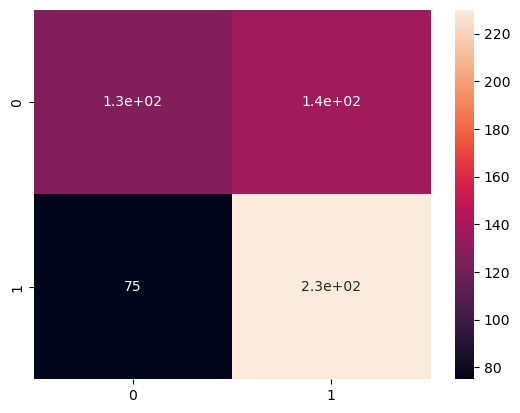

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
sns.heatmap(conf_mat, annot = True)
print(clf_report)
plt.savefig('Conf-mat.png', dpi=300)

In [78]:
# df.columns

In [79]:
# df.head()

## Compute ROC Cuve and AUC

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

## Plot ROC Curve

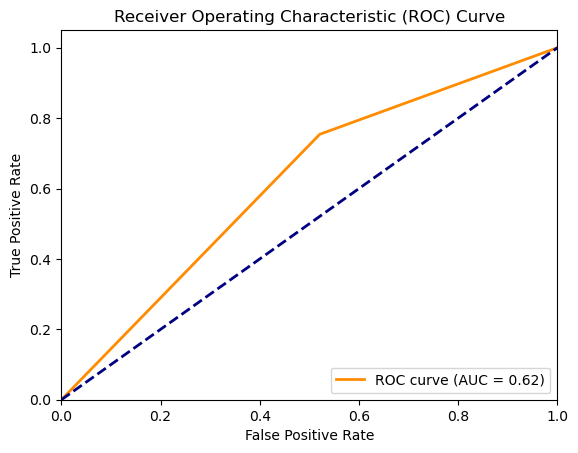

In [83]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc.png', dpi=300)
plt.show()

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {

    'alpha': [x/10 for x in range(1,11,1)]
}
best_clf= GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
best_clf.fit(X_train, Y_train)

In [ ]:
print("Best parameters:", best_clf.best_params_)
print("Best cross-validation accuracy:", best_clf.best_score_)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(Y_test, best_clf.predict(X_test))
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()